(900, 1200, 3)
uint8


<IPython.core.display.Javascript object>


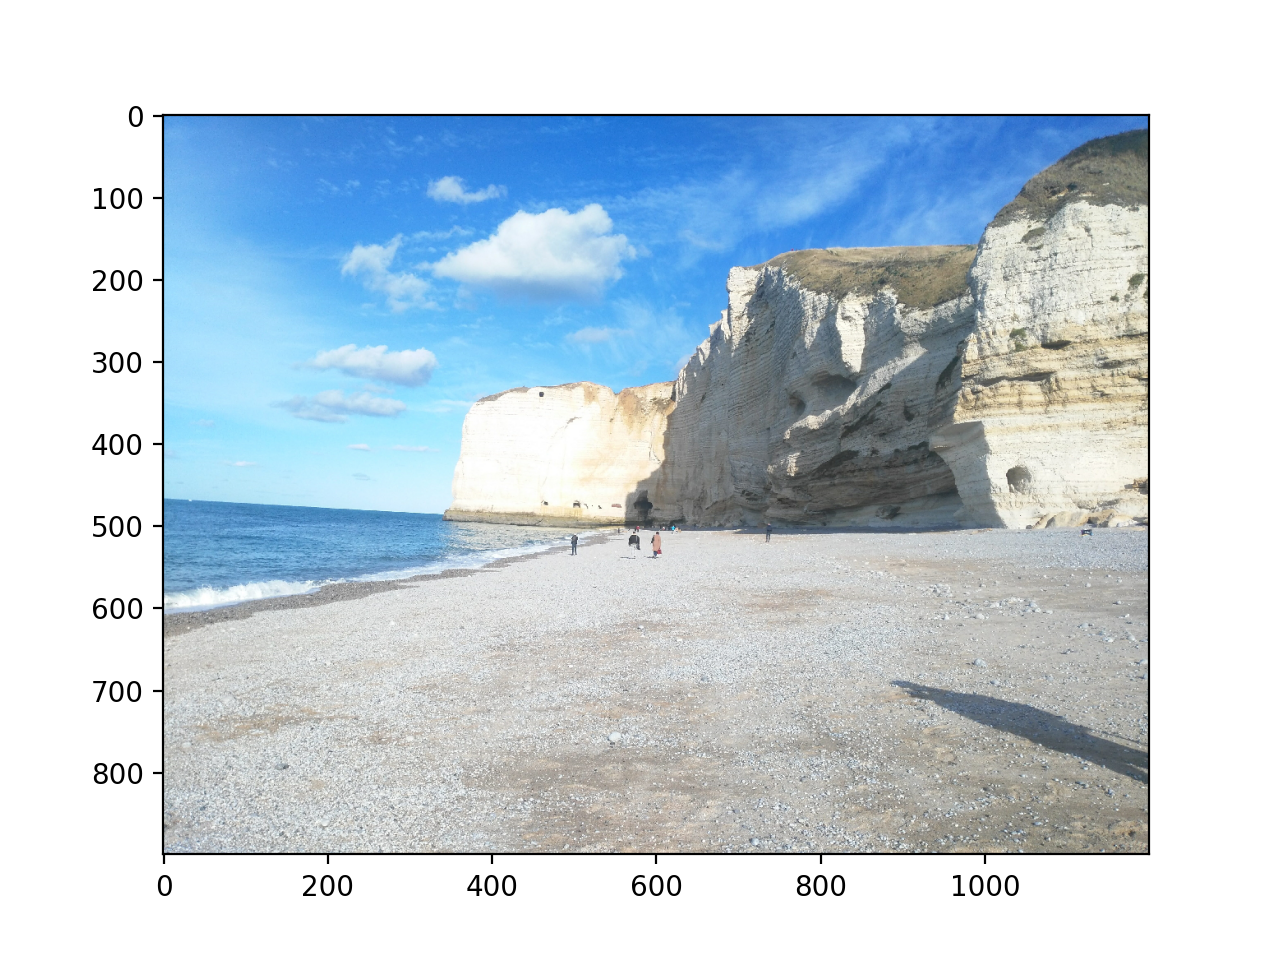

In [41]:
from skimage.io import imread, imsave, imshow
import numpy as np
%matplotlib notebook

#lis et décris l'image traitée

im = imread('etretat.jpg')
print(im.shape)
print(im.dtype)

from matplotlib import pyplot as plt

plt.figure()
plt.imshow(im)
plt.show()


(85, 219)
uint8


<IPython.core.display.Javascript object>


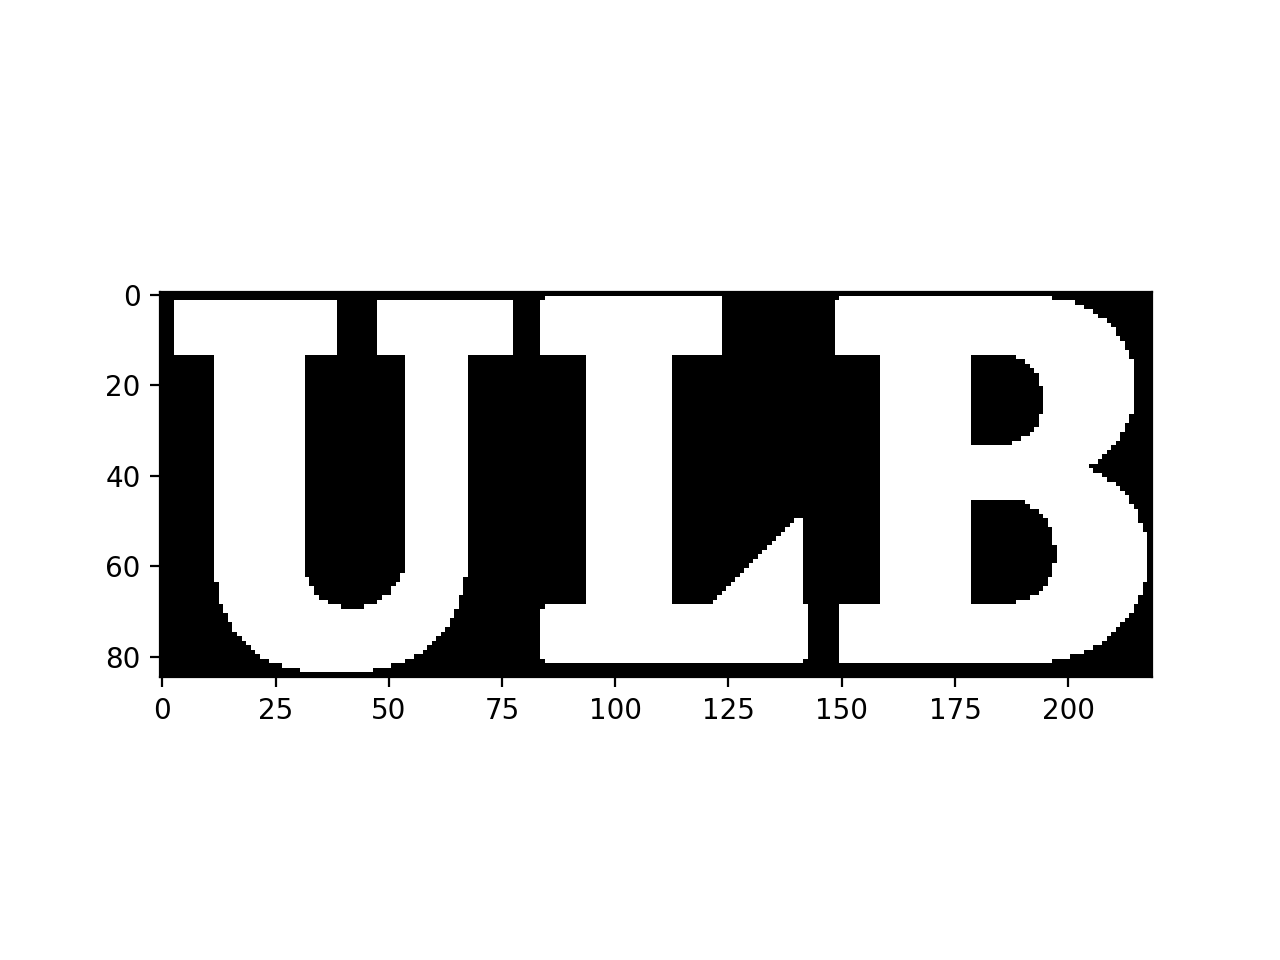

In [42]:
#lis et décris l'image watermark 

wm = imread('watermark.png')
print(wm.shape)
print(wm.dtype)
plt.figure()
plt.imshow(wm, cmap= plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


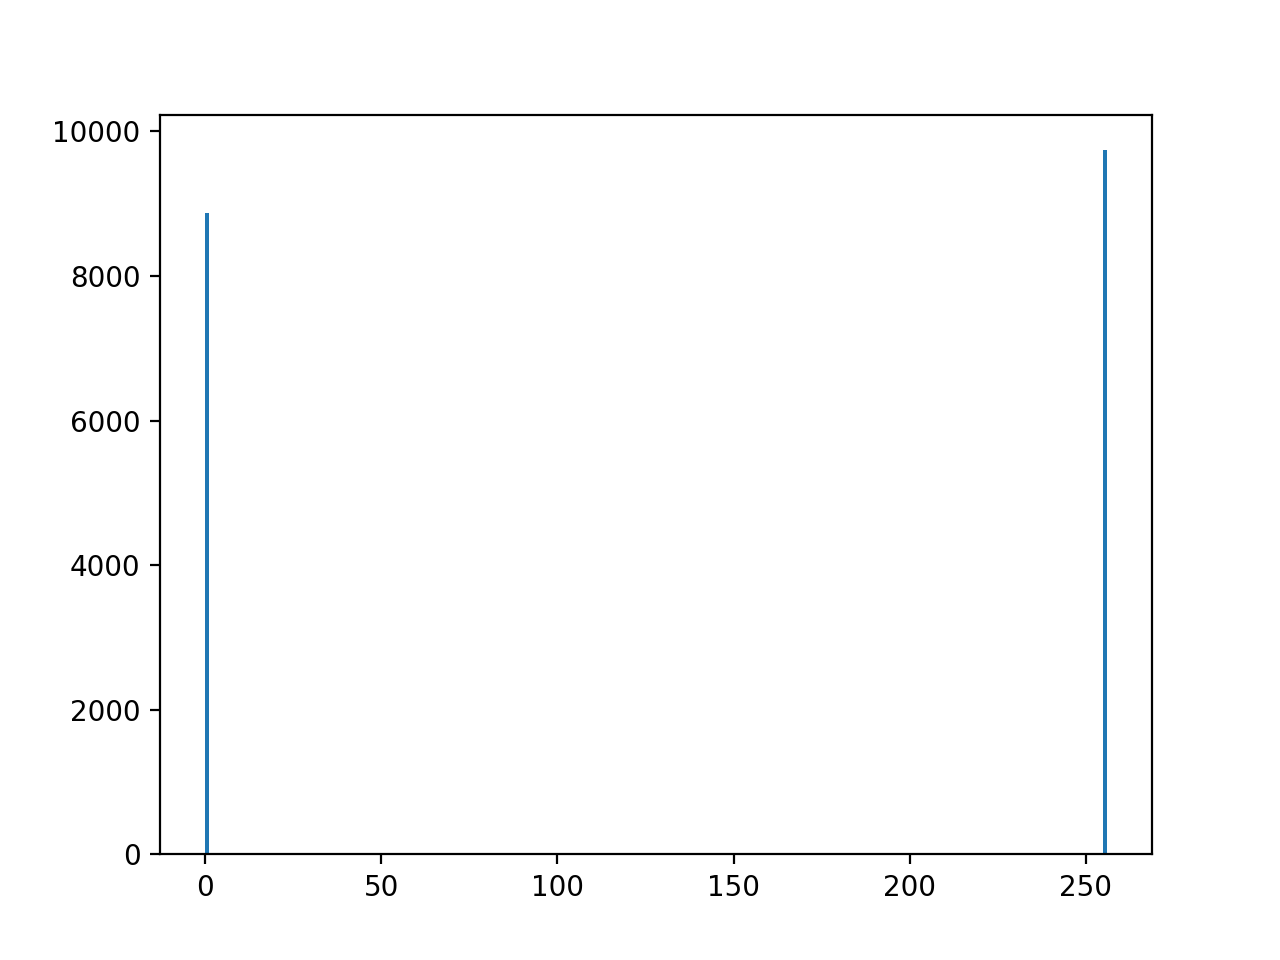

In [43]:
#confirmation du caractère binaire de l'image watermark
#sert à éventuellement ajuster le threshold pour une image plus complexe non binaire

plt.figure()
plt.hist(wm.flatten(), bins=np.arange(257))
plt.show()

In [44]:
def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v]= c
    cumul_hist /= cumul_hist.max()
    return cumul_hist



<IPython.core.display.Javascript object>


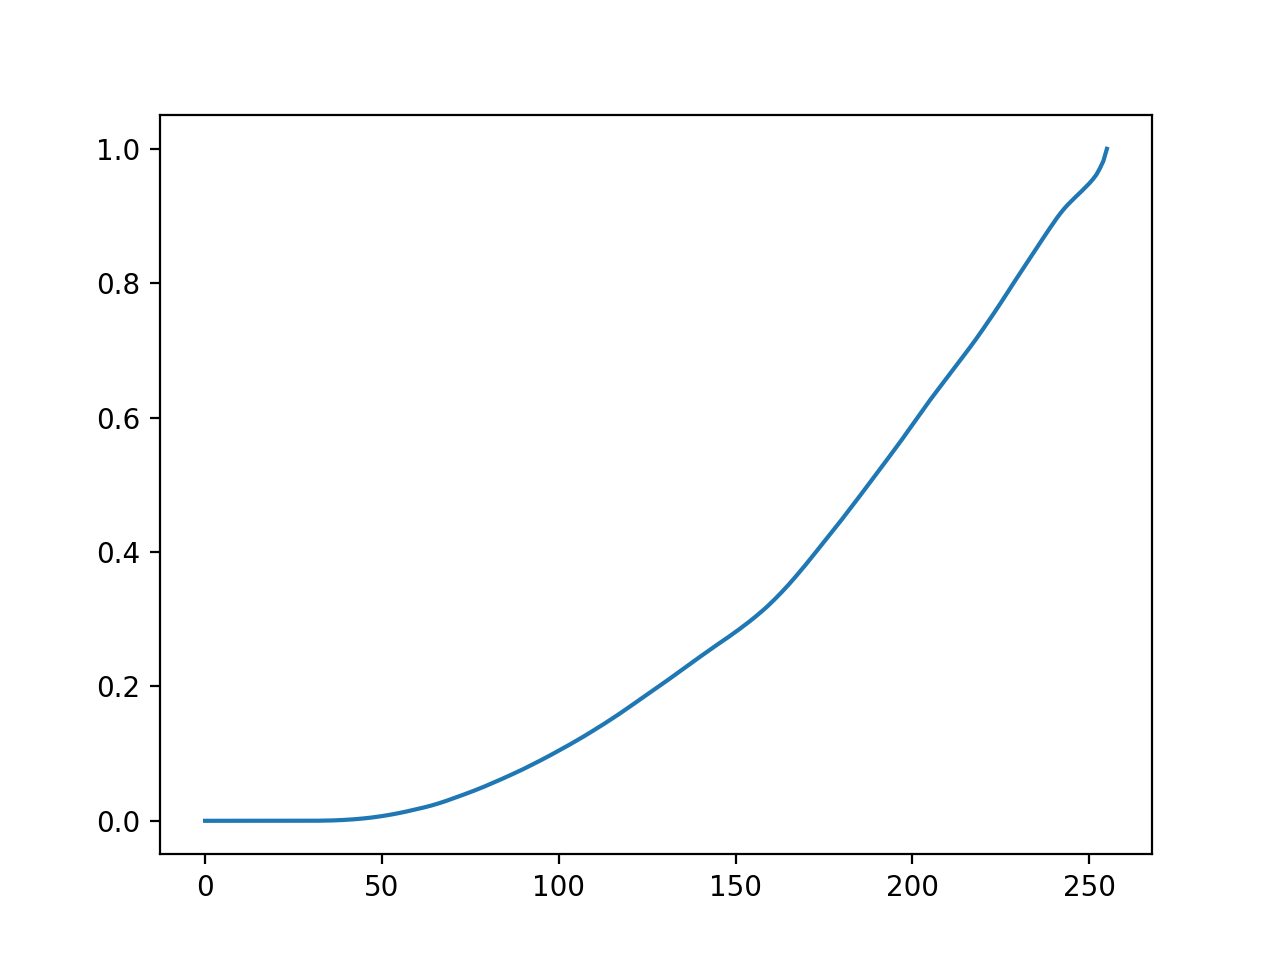

187


<IPython.core.display.Javascript object>


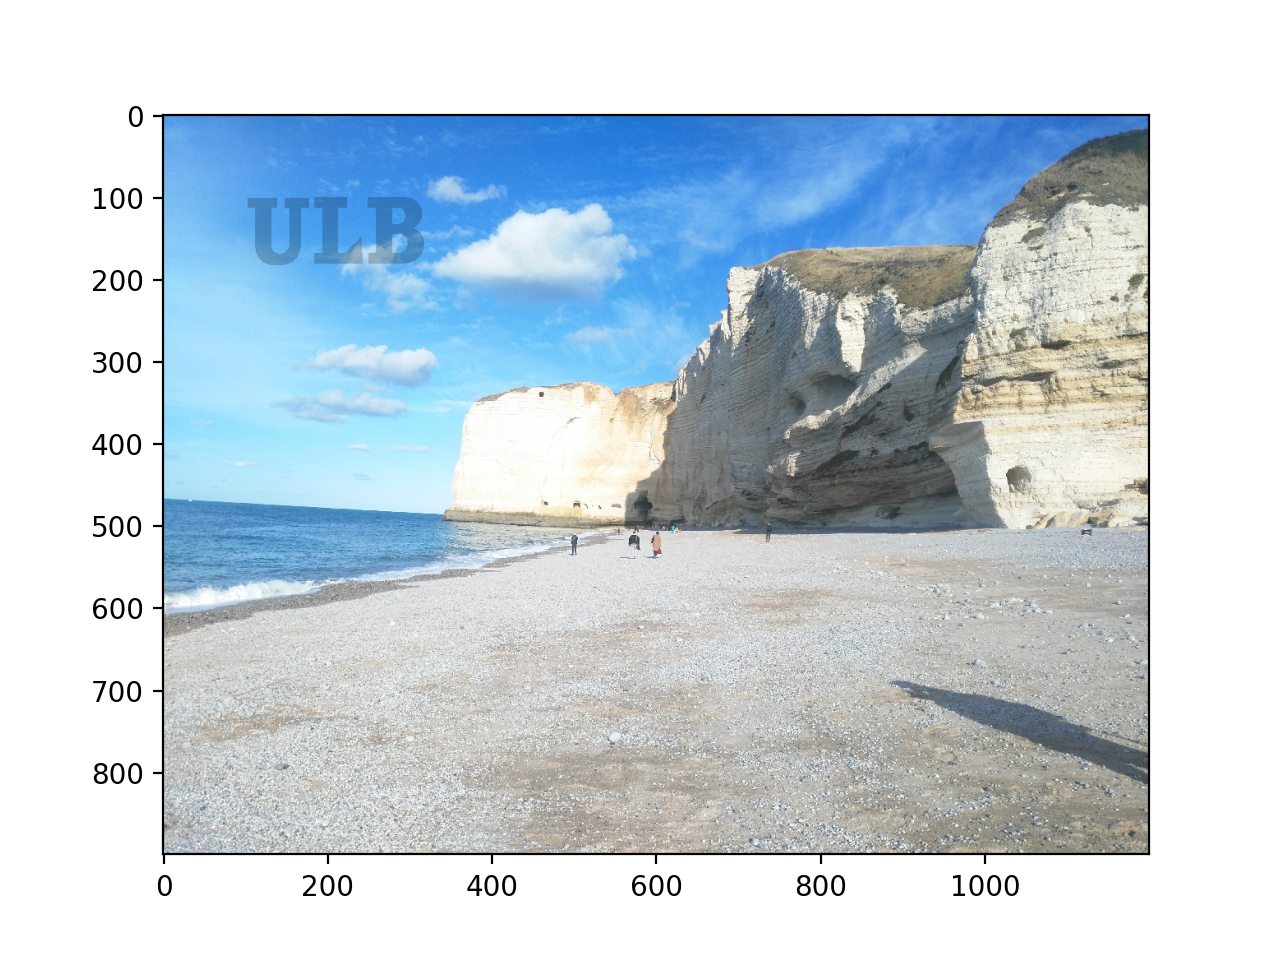

In [45]:
im2 = im.copy() #garde l'image originale

y_in = 100  #choix position coin supérieur gauche du wm
x_in = 100


h = cumul_hist(im) #histogram cumulé (= probabilité) de l'image

#not necessary to plot
plt.figure()
plt.plot(h)
plt.show()

for v in range(256): 
    if h[v] > 0.5:      #sélectionne les niveaux de gris représentant la moitié
                        #des pixels de l'image (proba cumulée = 0.5)
        break
Tmin = v-1
if(v==0):
    Tmin = 0
print(Tmin)

t = 0.8                 #coefficient de transparence

for i in range(im2.shape[2]):     #parcours tous les chanels de couleurs de l'image
    for j in range(wm.shape[0]):  #parcours tous les pixels du watermark pour 
                                  #trouver les blancs
        for k in range(wm.shape[1]):
            if(wm[j,k]>100):      #threshold arbitraire entre 0 et 255 pour séparer
                                  #blanc @ noir
                if(Tmin<125):     #Si une majeure partie des pixels sont foncés => 
                                  #garde wm blanc
                    im2[y_in+j,x_in+k,i] = wm[j,k] - t*im[y_in+j,x_in+k,i]  #remplace 
                                  #le niveau de gris de l'image par le blanc du wm -
                                  #une fraction de celui de l'image définie par la 
                                  #transparence
                        
                else:             #Si une majeure partie des pixels sont clairs => 
                                  #inverse couleurs wm
                    im2[y_in+j,x_in+k,i] = 255-wm[j,k] + t*im[y_in+j,x_in+k,i]
   
plt.figure()
plt.imshow(im2)
plt.show()

In [46]:
imsave('projet1.jpg', im2)